In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
df_emb = pd.read_csv("export_n_20.csv")

In [4]:
df_emb.head()

,customer_id,Unnamed: 1,num_journeys,max_journey,discover,number_accounts,one_more_journey,most_repeated_event,average_length_seq,approved_credit,...,downpayment_cleared,order_ships,max_milestone,has_prospecting,has_pre_application,initial_device,time_in_discover,time_in_apply,first_20_events,time_since_last_event
0,708,0,2,91,False,2,True,4,60.5,True,...,True,True,6.0,True,False,2.0,0.0,2045.0,[12 4 4 4 4 24 29 4 4 4 4 4 4 4 4 ...,[0.000000e+00 1.100000e+03 2.851830e+05 4.5900...
1,3591,0,1,63,False,1,False,4,58.0,True,...,False,False,1.0,True,False,2.0,0.0,218.0,[12 4 11 5 5 4 4 4 4 4 4 4 11 4 4 ...,[ 0. 218. 89. 20. 28. 24. 95. 75. 87. ...
2,5414,0,1,27,True,1,False,4,24.0,True,...,False,False,1.0,True,False,2.0,4544216.0,549.0,[21 12 4 2 4 11 4 11 5 4 11 4 11 5 4 ...,[0.000000e+00 1.783191e+06 5.490000e+02 2.1051...
3,6072,0,1,8,True,1,False,4,6.0,True,...,False,False,1.0,True,False,2.0,1089605.0,260.0,[12 4 2 4 24 21 0 0 0 0 0 0 0 0 0 ...,[0.000000e+00 2.600000e+02 6.630000e+03 1.0896...
4,8039,0,1,11,True,1,False,19,11.0,True,...,False,False,1.0,False,False,2.0,30400833.0,21684.0,[19 19 19 19 19 3 19 19 12 2 4 0 0 0 0 ...,[0.0000000e+00 5.8000000e+01 2.0000000e+00 3.0...


In [31]:
X_cols = ['max_journey', 
          'discover',
          'number_accounts', 
          'most_repeated_event', 
          'average_length_seq',
          'has_prospecting',
          'event_id_0',
          'event_id_1',
          'event_id_2',
          'event_id_3',
          'event_id_4',
          'time_0', 
          'time_1',
          'time_2',
          'time_3', 
          'time_4']

In [34]:
X = df_emb[X_cols]
y = df_emb['order_ships']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.840307378279402


## With Downsampling

In [38]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_emb[df_emb['order_ships'] == 0]

df_minority = df_emb[df_emb['order_ships'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=16138,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['order_ships'].value_counts()

0.0    16138
1.0    16138
Name: order_ships, dtype: int64

In [39]:
X = df_downsampled[X_cols]
y = df_downsampled['order_ships']

32276

In [40]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.840307378279402


## Confusion Matrix

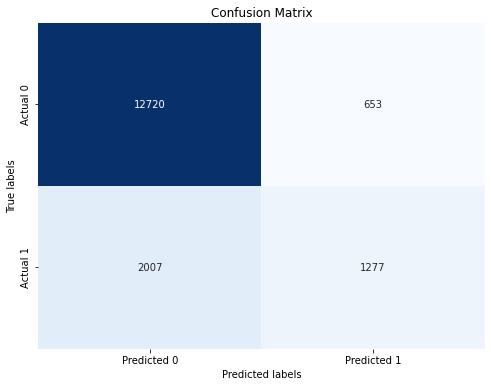

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     13373
         1.0       0.66      0.39      0.49      3284

    accuracy                           0.84     16657
   macro avg       0.76      0.67      0.70     16657
weighted avg       0.82      0.84      0.82     16657



In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


true_labels = y_test
predicted_labels = y_pred

cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels, predicted_labels)

print(report)